# Exploratory Data Analysis (EDA)

In [273]:
# Importing Libraries and datasets
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("../dataset/raw/train.csv")
test_df = pd.read_csv("../dataset/raw/test.csv")

Text(0.5, 1.0, 'Transported Feature Distribution')

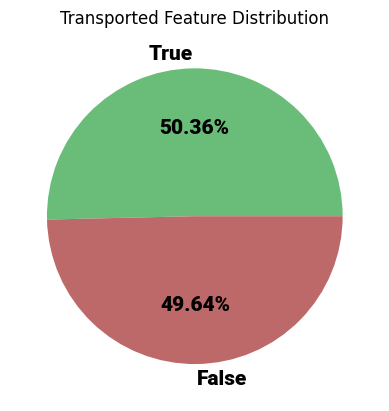

In [274]:
# Visualizing feature "Transported"
plt.pie(train_df["Transported"].value_counts(), labels=["True", "False"], autopct="%1.2f%%", textprops={"fontsize": 15, "fontweight": "black", "fontname": "Roboto"}, colors=sns.color_palette(["#69bd78", "#bd6969"], 2,))
plt.title("Transported Feature Distribution")

### ⚠ Observations
 We can observe that our Transported Feature is highly balanced, so we don't have to use techniques like under_sampling or over_sampling.

Text(0.5, 1.0, 'Age Feature Distribution')

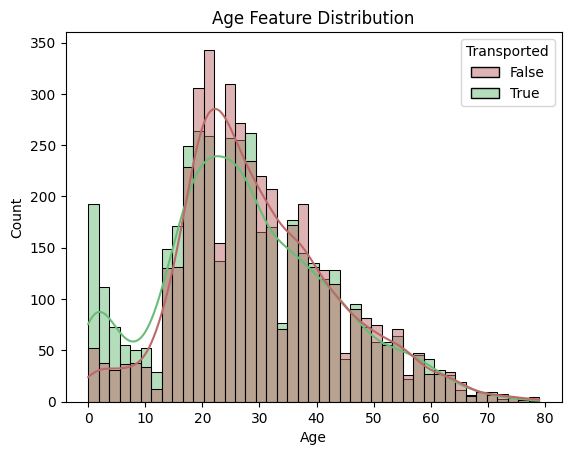

In [275]:
# Visualizing Age Feature
sns.histplot(x=train_df["Age"], hue="Transported",data=train_df, kde=True, palette=["#bd6969", "#69bd78"])
plt.title("Age Feature Distribution")


### ⚠ Observations
DO OBSERVATIONS